# Abstract

We introduce the Python package *ecophylo* dedicated to coalescent-based simulation of eco-evolutionary dynamics. Species assemblages and their shared ancestry can be simulated by jointly taking into account the influence of past demographic fluctuations and extinctions along with how divergent genotypes have introduced new species over time through speciation.

The shared co-ancestry of present individuals is simulated backward in time using coalescent theory. Speciation events are then sprinkled over the simulated genealogy conditionally to its topology and branch lengths. The phylogenetic relationships amongst individuals and their abundances are finally obtained by merging paraphyletic clades into single species. Coalescent reconstruction of the genealogy of individuals can be simulated to represent past demographic fluctuations due to varying habitat availability, or include multiple communities linked by migration events.

The package includes tools to simulate large numbers of datasets and associated summary statistics, so that Approximate Bayesian Computation methods can be used to estimate parameter values of these processes.. Diverse patterns of taxonomic and phylogenetic compositions can be generated. The first version of the package allows simulating neutral coalescent genealogies, and will incorporate further non-neutral eco-evolutionary scenarios in future. The package can be used to explore how past demographic fluctuations have affected species abundances and phylogenetic relationships, and to estimate the parameters of these processes based on observed patterns. We provide step by step examples in both Python and R languages.

Key-words: eco-evolutionary modelling; community phylogeny; coalescent; demographic stochasticity, ecological drift, extinction-speciation dynamics

# Introduction
Observed species distributions and biodiversity patterns are shaped by current ecological processes but also reflect the influence of past evolutionary and biogeographic dynamics (Svenning 2015). For instance, alternating periods of contraction and expansion of suitable environmental conditions should affect both demographic (Avise 2009) and diversification dynamics over time (Barthelemy et al. Frontiers 2021, Lewitus and Morlon 2018 ).  Hence, a fundamental goal of biogeography is to understand how changes in suitable environmental conditions due to past climatic and geomorphologic history have shaped biodiversity patterns observed at present (Bennett 1990). Historical biogeography typically investigates how species appear, go extinct and migrate, without considering the role of demography and community assembly dynamics over time (e.g., Yu, Harris & He, 2010). Conversely, population genetics and phylogeography emphasize the joint role of migration, mutation and drift in driving patterns of population genetic diversity in space and time (Avise, 2009). Specifically, comparative phylogeographic approaches aim to grasp congruent or differing influence of past historical events led by environmental fluctuations on several co-occurring taxa (Arbogast and Kenagy 2001, Swenson 2019, Overcast et al. 2019, 2020). Concurrently, the neutral theory of biogeography has underlined the role of migration, speciation and drift in shaping patterns of taxonomic diversity in space and time (Hubbell, 2001). Integrative modeling approaches are still needed to bridge the gap between phylogeography and historical biogeography,  in order to better understand biodiversity dynamics at multiple spatial and temporal scales (Lexer et al 2013).

However, most approaches investigating how intertwined ecological and evolutive forces shape the relative abundances of species  have assumed an equilibrium state of biodiversity at present. Specifically, the neutral theory of biodiversity (Hubbell 2001) defines the fundamental biodiversity number θ as equal to 2·Jm·ν (with Jm the regional assemblage size and ν the speciation rate per lineage per generation), which has been estimated for various biomes across the globe (Jabot and Chave 2008, Etienne et al. 2006). However, this number assumes that Jm has been constant from present backward, until all lineages coalesced into their Most Recent Common Ancestor (MRCA) (Etienne et al. (2004, 2005)). Yet, in the case where past environmental variations (especially climate) have caused the sizes of communities to fluctuate over time, these should have affected ecological drift dynamics. In the case where these fluctuations occur rapidly compared to the expected time-to-equilibrium of speciation, migration and drift dynamics (for instance with long-lived organisms with slow population dynamics), we expect that current biodiversity patterns should retain the signature of past environmental fluctuations. Thus by allowing $J_m$ to vary at specific ages of the past we can relax this consistency assumption  and account for the discordance of demographic histories between distinct regional species pools. 

Over longer time scales, larger geological events can affect diversification rates, ie. the outcome of extinction and speciation leading to increased phylogenetic diversity (Alroy 2008). The separation of the geographical range of multi-species assemblages through the development of physical barriers can lead to allopatric speciation - a process well know to biogeographers as vicariance. Also, the ability of species to cross biogeographic borders and migrate to a given region can increase the phylogenetic diversity of the regional pool (Pennington 2004). Dispersal and vicariance are thus often considered as competing hypothesis used to explain the spatial distrubutions of extant taxa. Hence, past environmental fluctuations and biogeographic events of vicariance and/or migration have jointly influenced the evolutionary trajectory of multi-species assemblages.Here we propose a novel simulation-based approach in which we consider how assembly dynamics in temporally changing environments (ecological perspective) affect speciation and extinction dynamics over a long-term (evolutionary perspective), depending on environmental changes over time.

We expose here the logic and advantages of the approach to examine how past multi-species non-equilibrium dynamics have shaped patterns of taxonomic and phylogenetic diversity. We show how the library can be used to design in silico experiments (Zurell 2010) to address the possible outcome of (meta)community models. Simulating ecological communities and the phylogenetic diversity within and between assemblages according to different scenarios can help establish a benchmark against which to infer the signatures of community-wide past biogeographic processes from the resulting patterns of taxonomic and phylogenetic diversity. The initial version of the method presented here is suited to the simulation of neutral eco-evolutionary dynamics, but future versions will allow further deviation from neutrality. The package includes options to simulate large numbers of datasets over broad ranges of parameters and scenarios of past demographic events and fluctuations. These methods are destined to be used alongside ABC methods so as to estimate parameters of past demographic fluctuation from the observation of actual patterns of diversity (Csillery et al 2015).

# Core simulation algorithm in ecophylo.simulate 
## Coalescent-based simulation of assemblage genealogies

The core model rests on the fundamental hypothesis that fluctuations in the relative species abundances in a given habitat over time are driven by neutral population dynamics, depending on the size of the assemblage (Hubbell, 2001). Following the Hudson coalescent model (Hudson 1983), we assume that all individuals shrunk to their haplotypes can reproduce freely within the assemblage, and with equal fitness (neutral assumption). The dynamics of the assemblage they form can be represented by coalescence, i.e. by tracing the shared co-ancestry of extant individuals backwards in time until a single common ancestor is found (Kingman 1982). Generations in the model are discrete and non-overlapping, and a single coalescence event can happen at a given generation. We can thus simulate the shared co-ancestry of n sampled individuals observed at present time in a local assemblage, using a backward simulation of the coalescent tree. Coalescence is an event such as two lineages at generation t share the same ancestor at generation t-1, which defines a bifurcating node in the genealogy of individuals. 
When n<<J_m (t), the distribution of coalescence times can be approximated as an exponential law with parameter λ proportional to 1/(2·J_m (t)) {Wakeley, 2009}. Therefore, the distribution depends on the fluctuation of Jm(t) over time, thereby on the history of habitat extant in which the regional assemblage is included. The topology of the genealogy is thus influenced at predefined, paleoenvironmentally different periods by the corresponding variation of J_m (t). 
In addition, the genealogy depends on spatial structuring and migration dynamics across local assemblages. The coalescent simulator (Kelleher, 2020) used in ecophylo supports a discrete-deme model in which assemblages exchange migrants at given rates supplied in a migration matrix. This migration matrix can be parameterized to encompass a wide range of migration scenarios, and can also depend on t so as to represent changing migration dynamics during biogeographic history.

[ADD PART HERE]

## Phylogenetic reconstruction and species abundances

We sprinkled mutation events  over the branches of simulated genealogies depending on branch lengths, so that the number of mutations over a branch followed a Poisson distribution with parameter $\mu·B$ where $\mu$ is the point mutation rate and $B$ is the length of the branch. The descendants stemming from a branch with at least one mutation defined a genetically distinct clade. Since an extant species should be a monophyletic genetic clade distnct from other species, all paraphyletic clades of haplotypes at present were merged to form a single species. Therefore, monophyletic lineages with distinct genotypes and older than two generations  were considered a distinct species (Manceau et al. 2016). We derived thusly the phylogenetic relationships among individuals as well as the number of individuals  descending from a speciation eve nt in the genealogy, which defined the species abundance in the sample at present.

# Application of the eco-evolutionary model
Here we show how to simulate communities and their phylogenetic relationships for a wide range of past demographic scenarios having affected whole assemblages of species using the *ecophylo* package in Python language. We also provide ways to produce many simulated datasets from prior distributions so as to allow Approximate Bayesian Computation (ABC) methods to infer parameter values from the comparison of simulated assemblages to observed diversity patterns.

## Simulating past demographic fluctuations of multiple species

The ecophylo package essentially articulates itself around the ecophylo.simulate function. This function implements the above-mentioned simulation algorithm and allows users to simulate a phylogeny in Newick format, given a combination of parameter values representing the past demographic history of $J_m$. Each demographic event accounting for the history of $J_m$ occurs at a specific time which users must supply in *changetime* as a list in the order in which they occur. In the following example, an assemblage of species and their phylogenetic relationships are simulated assuming that $J_m$ has fluctuated in the past over 3 predefined periods, from present to 700 generations ago, from 700 to 10000 generations ago and finally from 5000 generations until a common ancestor is found. 

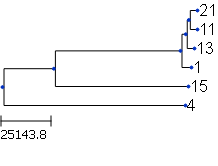

In [1]:
import ecophylo
n = 25 #the number of sampled individuals
com_size = [[5000,10000,50000]] # the size of the assemblage in the past, the first element is the current assemblage size
mu = 0.001 # the point mutation rate
changetime = [[0,700,10000]] # the dates (in generation time) at which the assemblage has changed sizes in the past


tree = ecophylo.simulate(samples = n,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime, seed= 42)

tree.render("%%inline") 


We can then compute summary statistics on the resulting phylogeny. The *getAbund* function allows us to retrieve the number of individuals descending from a speciation event in the genealogy, thus defining the species abundance in the sample at present. 

In [2]:
import numpy as np

abund = ecophylo.getAbund(tree)

shannon = -sum([a/sum(abund)*np.log(a/sum(abund)) for a in abund if a != 0])
simpson = sum([a/sum(abund)**2 for a in abund if a != 0])
invsimpson = 1/simpson


In [10]:
print("Shannon-Weaver index = " + str(shannon))
print("Simpson's diversity index = " + str(simpson))
print("Inverse Simpson's = " + str(invsimpson)) 

Shannon-Weaver index = 1.6793741045013952
Simpson's diversity index = 0.04
Inverse Simpson's = 25.0


These summary statistics can then be used to compare different eco-evolutionary scenarios having yielded different patterns of extant community composition. 

## Simulating multi-species population structure and history 

The demographic history of $J_m$ can be further complexified by not only considering demographic fluctuations but also including multiple demes linked by vicariance events and/or migration. Multiple demes can be supplied to the *ecophylo.simulate* function, by specifying the the number of sampled individuals in each deme in list format. In the following section we show how to simulate an assemblage of species and their phylogenetic relationships, whereby multiple demes can fluctuate in size over time and be linked by vicariance and/or migration of varying intensity.  

### Multiple demes linked by migration

The detailed demographic history of each deme should be supplied as a nested list in *com_size* along with the corresponding dates in *changetime* (in generation time) at which the changes in size occur. Note that if no migration information is provided (or vicariance events, but see dedicated section) the simulation algorithm assumes a symmetric migration rate of 1, to insure coalescence. In the following example, we consider two demes whose sizes have fluctuated in the past which are linked by a symmetric migration rate of 0,7. 

**EXPLAIN MIGRATION AS A BACKWARD PROCESS AND GIVE PEOPLE MASSIVE BRAIN DAMAGE**


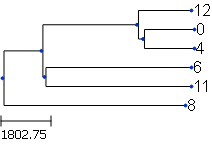

In [4]:
samples = [5, 10] # the number of sampled individuals in each deme
com_size = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetime = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = 0.7 # the symmetric migration rate between demes

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime,
                         migr = migr, seed= 42)

tree.render("%%inline") 

A more complexe migration history can be provided, for instance by supplying a detailed migration matrix in the case where migration is not symetric or a list of migration matrixes (or symmatric migration rates) in the case where these have varied in the past. In this case, the dates at which migration has changed should be provided to *ecophylo.simulate* using the *migr_time* parameter. 

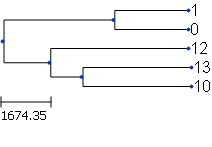

In [11]:
samples = [5, 10] # the number of sampled individuals in each deme
com_size = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetime = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = [[[0,0.1],
        [0.2,0]]
        ,
        [[0,0.3],
        [0.4,0]]
        ,
        [[0,0.5],
        [0.6,0]]
        ,
        [[0,0.7],
        [0.6,0]]] # the migration matrixes between demes in the past, the first element is the current migration matrix

migr_time = [0, 100, 200, 300] # the dates in the past (in generation time) at which the migration rate has changed

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= changetime,
                         migr = migr,
                         migr_time = migr_time, seed= 42)

tree.render("%%inline") 

In situations with multiple demes, we can compute summary statistics of $\beta$ diversity. The *getDeme* function allows us to retrieve the deme of the individuals descending from a speciation event in the genealogy and thus species abundances relative to each deme. 

In [ ]:
# Maxime is working on getDeme
# this chunk should give an example of beta-diversity 

### Simulating vicariance events

*write some stuff here*


In [12]:
samples = [3,3,3]
com_size = [[200], [200, 300, 400], [200]]
change_time = [[0], [0, 1000, 2000], [0]]
vic_events = [[1000, [0,1], 1],
              [2000, [1,2], 1]]

tree = ecophylo.simulate(samples = samples,
                         com_size= com_size, 
                         mu = mu, 
                         changetime= change_time,
                         vic_events = vic_events, seed= 42)

ValueError: Trying to merge with inactive deme

# Discussion

*Ecophylo* bridges the gap between ecological models by incorporating assembly and population dynamics with evolutionary models considering the appearance, disappearance of taxa over time without explicit reference to their population dynamics. The introduction of the model as a feely available Python library, the flexibility in parametrization as well as the simplicity of the simulation outputs allows its integration to the wide range of tools and approaches for more general analysis of biodiversity patterns.

Studies in ecology often neglect the influence of evolutionary events, by customarily considering the regional species pool from which communities assemble via rapid local dynamics as a snapshot in evolutionary history (Lessar et al. TREE 2012). However, recent studies have called for a fuller integration of biogeographic history into community ecology (Swenson 2019, Overcast et al. 2019, 2020), as well as for a more mechanistic modeling of key processes shaping the composition of species pools (Denelle et al. 2019). With the novel simulation algorithm proposed in the ecophylo package, we explicitly represent how elementary ecological mechanisms such as ecological drift and migration (Vellend 2010) in a finite, temporally variable environment shape evolutionary trajectories and result in extant patterns of phylogenetic and taxonomic diversity. First of all, our model allows relaxing the assumption of constancy in metacommunity size of the neutral theory of biodiversity (Hubbell 2001), and thus accounts for the discordance of demographic histories between distinct regional species pools with fluctuating sizes over time. Also, modeling speciation as a gradual process by providing a way to delimit extant (Manceau et al. 2015) meets more realistic expectations than considering speciation as an instantaneous event (Rosindell et al. 2010). Secondly, the simulation algorithm proposed in the ecophylo package by decoupling the dynamics of individuals in a fluctuating environment from the speciation process, allows extending the coalescent modeling framework (Kingman 1982) to consider multiple species assemblages (Manceau et al. 2015).  Thus, ecophylo can be used in the context of phylogeography to investigate the remnant influence of past biogeographic events on several co-occurring taxa (Barthelemy et al. Frontiers Ecol Evol 2021).

**add a few things here about vicariance-migration --> ecophylo can be used to simulate phylogenies over borad ranges of paramters representing different degrees of migration within vicariance scenarios. can be used for model selection or at least comparison. etc** 

Moreover, the dosimul  function of the ecophylo package makes it possible to generate patterns of diversity along broad ranges of parameter values reflecting contrasted scenarios of past demographic fluctuations having affected multi-species assemblages. An overarching goal in both ecology and evolution is to deduce the mechanisms responsible for shaping diversity patterns from the limited information they contain at present (McGill 2019, Stouffer 2019). By adopting a mechanistic modeling approach of eco-evolutionary processes we can first address whether a set of given metrics is sensitive to the mechanisms we chose to investigate by designing virtual experiments. For instance, we can compare large virtual datasets generated over a wide range of parameters which reflect the continuum of biogeographic scenarios we wish to investigate, and then determine which subset of metrics, if any, can keep track of these mechanisms of interest (Barthelemy et al. 2021, Frontiers). Second, we can use these same simulated datasets to carry out inference, that is retracing the most likely past demographic history of Jm based on the comparison of these datasets to actual extant biodiversity patterns (Csillery et al. 2010). Explicating   the demographic history of Jm prevents us from using a likelihood function that exist when approximating Jm as the harmonic mean of the per-generation Jm dynamics (Etienne 2005). Furthermore, the speciation model itself can add considerable complexity to the demographic model depending on the constraints it imposes on the speciation process, for instance with protraction or the strict respect of monophyly. In these situations, theta has no tractable analytical solutions for a given set of demographic parameters, as it has been largely shown in population genetics. However, with Approximate Bayesian Computation (ABC) methods we can avoid computing the explicit likelihood of the model by approximating it through the relative proximity between the true dataset and datasets simulated given a coalescent model (Csillery 2012, Beaumont 2010, Jabot and Chave 2008).

The baseline eco-evolutionary model provided in ecophylo assumes neutrality. That is, species are evenly subject to fluctuations in the size of the assemblage they form with no regards to how individual fitness differences may influence their probability to persist in a given environment or migrate. Increasing the complexity of the model would require accounting for the ways in which deterministic processes such as biotic and abiotic filtering or natural selection can affect diversification dynamics depending on the adequacy of species niches to fluctuating environments over time (Ewing and Hermisson 2010, Ovaskainen et al. 2011, Karhunen et al. 2013, Manceau et al. 2016). Yet, because of the implications simulating all these elementary mechanisms for all individuals forward in time would have on computation times, we have focuses on a coalescent framework (Munoz et al. 2018). Later versions of the ecophylo package should gain in complexity by drawing from recent developments in coalescent simulation algorithms implementing spatially explicit methods (Kelleher et al. 2014 ; Rosindell et al. 2008), natural selection (Shlyakhter et al. 2014) or individual/species interactions (Lepers et al. 2021 ). Yet, for the time being, ecophylo in its initial version, with the flexibility in parameterization of simulations along with in the choice of summary statistics for ABC analyses, can be used as a neutral baseline to investigate how elementary mechanisms of mutation, drift and migration in a finite fluctuating environment influence evolutionary trajectories and thus shape patterns of diversity.